total percentage of total 10 creators are: 16.606175939731617
Yellow for VERIFIED NOT HUMAN
Green for HUMAN NOT VERIFIED
Red for NOT VERIFIED NOT HUMAN
Blue for VERIFIED AND HUMAN


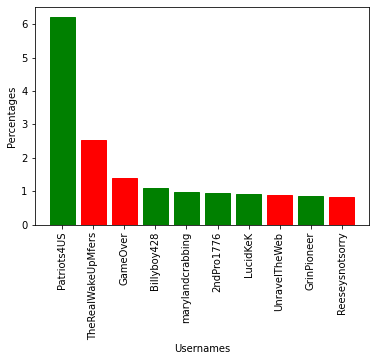

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

datasetuser=pd.read_csv('parler_userData.csv');
datasetposts=pd.read_csv('parler_postsData.csv');
userdataarray=datasetuser.to_numpy();
datapostarray=datasetposts.to_numpy();
scorer=datasetposts['Creator'].value_counts()[0:10]
indextopten=scorer.index.tolist()
countofverified=0;
s1=sum(scorer,0);
scorer=scorer.to_dict()
percentage=(s1/101944)*100; 
print("total percentage of total 10 creators are: {}".format(percentage))
#print(type(userdataarray);
vnames=[];verified=[];human=[];notvnoth=[];vh=[];percent=[];
for i in scorer.keys():
  for k in userdataarray:
    if(k[2]==i):     
      vnames.append(k[5])
      v=k[-1];h=k[-2];
      if(k[-1] and k[-2]):
        vh.append(k[5]);
      elif(k[-1] and not k[-2] ):
        verified.append(k[5]);
      elif(not k[-1] and k[-2]):
        human.append(k[5]);
      else:
        notvnoth.append(k[5]);
      p1=(scorer[i]/101944)*100
      percent.append(p1);
barlist = plt.bar(vnames, percent, align = 'center', alpha = 1)
plt.ylabel('Percentages'); plt.xticks( vnames )
plt.xlabel('Usernames')
plt.xticks(rotation=90)
for i in range(10):
  if vnames[i] in verified:
    barlist[i].set_color('o')
  elif vnames[i] in human:
    barlist[i].set_color('g');
  elif vnames[i] in notvnoth:
    barlist[i].set_color('r');
  else:
    barlist[i].set_color('b');

print("Yellow for VERIFIED NOT HUMAN")
print("Green for HUMAN NOT VERIFIED")
print("Red for NOT VERIFIED NOT HUMAN")
print("Blue for VERIFIED AND HUMAN")
plt.show();
  

2ND QUESTION Top 10 user with most upvotes, most interactions and most mentioned 

Yellow for VERIFIED NOT HUMAN
Green for HUMAN NOT VERIFIED
Red for NOT VERIFIED NOT HUMAN
Blue for VERIFIED AND HUMAN


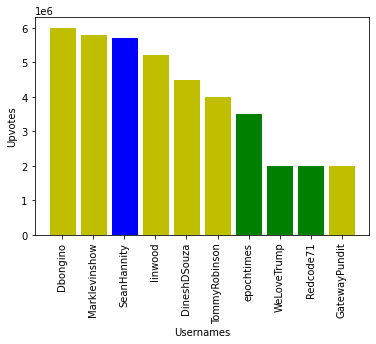

In [46]:
frequent_score = datasetuser.sort_values(by=['Score'], ascending=False).to_numpy()[0:10];
## Verified for frequent score
vnames=[];verified=[];human=[];notvnoth=[];vh=[];upvotes=[]
for row in frequent_score:
  vnames.append(row[5])
  upvotes.append(row[1]);
  if(row[-1] and row[-2]):
    vh.append(row[5]);
  elif(row[-1] and not row[-2] ):
    verified.append(row[5]);
  elif(not row[-1] and row[-2]):
    human.append(row[5]);
  else:
    notvnoth.append(row[5]);

def plotter(names, quality, verified, human, notvnoth, verhum, y ):
  lister=plt.bar(names,quality, align='center',alpha=1);
  plt.ylabel(y);
  plt.xlabel('Usernames')
  plt.xticks(rotation=90)
  count=0;
  for i in names:
    if i in verified:
      lister[count].set_color('y')
    elif i in human:
      lister[count].set_color('g')
    elif i in notvnoth:
      lister[count].set_color('r')
    else:
      lister[count].set_color('b')
    count+=1
  print("Yellow for VERIFIED NOT HUMAN")
  print("Green for HUMAN NOT VERIFIED")
  print("Red for NOT VERIFIED NOT HUMAN")
  print("Blue for VERIFIED AND HUMAN")
  plt.show();

plotter(vnames, upvotes, verified, human, notvnoth,vh, 'Upvotes');








Yellow for VERIFIED NOT HUMAN
Green for HUMAN NOT VERIFIED
Red for NOT VERIFIED NOT HUMAN
Blue for VERIFIED AND HUMAN


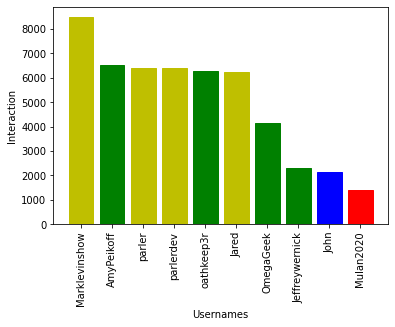

In [47]:
frequent_interactions=datasetuser.sort_values(by=['Interactions'], ascending=False).to_numpy()[0:10];
vnames=[];verified=[];human=[];notvnoth=[];vh=[];interaction=[];
for row in frequent_interactions:
  vnames.append(row[-4])
  if(row[-1] and row[-2]):
    vh.append(row[5]);
  elif(row[-1] and not row[-2] ):
    verified.append(row[5]);
  elif(not row[-1] and row[-2]):
    human.append(row[5]);
  else:
    notvnoth.append(row[5]);
  interaction.append(row[-3]);
plotter(vnames, interaction, verified, human, notvnoth,vh, 'Interaction');



Yellow for VERIFIED NOT HUMAN
Green for HUMAN NOT VERIFIED
Red for NOT VERIFIED NOT HUMAN
Blue for VERIFIED AND HUMAN


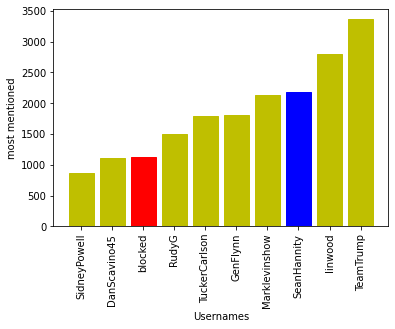

In [43]:
most_mentioned={}
#print(datapostarray[2][3]);
for row in datasetposts['At']:
  if(len(row)>2):
    s=row[1:len(row)-1]; l1=s.split(",")
    for i in l1:
      s2=i.split(":")[0]
      index=0;
      for i1 in s2:
        if i1=="'":
          break;
        index=index+1
      s2=s2[index+1:len(s2)-1]
      if s2 in most_mentioned.keys():
        count=most_mentioned[s2]
        most_mentioned[s2]=count+1;
      else:
        most_mentioned[s2]=1;
#print(most_mentioned);
most_mentioned=sorted(most_mentioned.items(), key = 
             lambda kv:(kv[1], kv[0]))
most_mentioned=most_mentioned[len(most_mentioned)-10:];
verifiedfrequency=[];notverified=[];
vnames=[];verified=[];human=[];notvnoth=[];vh=[];most_mention=[];
for i in most_mentioned:
  for k in userdataarray:
    if(i[0]==k[5].lower()):
      vnames.append(k[5]);
      if(k[-1] and k[-2]):
        vh.append(k[5]);
      elif(k[-1] and not k[-2] ):
        verified.append(k[5]);
      elif(not k[-1] and k[-2]):
        human.append(k[5]);
      else:
        notvnoth.append(k[5]);
      most_mention.append(i[1]);
#print(most_mention);



  

plotter(vnames, most_mention,verified, human, notvnoth, vh, 'most mentioned')

WORD CLOUD

<Figure size 864x864 with 0 Axes>

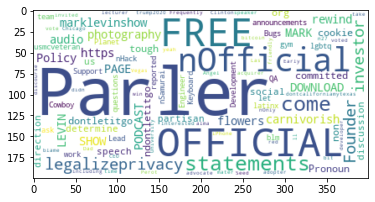

In [ ]:
from wordcloud import WordCloud, STOPWORDS
stopword=set(STOPWORDS)
stopword.add('the');stopword.add('this');stopword.add('will');stopword.add('shall');stopword.add('should');
stopword.add('would');stopword.add(',');stopword.add('&');stopword.add('-');stopword.add(".");stopword.add('now');stopword.add('can');stopword.add('one')
text=""
for row in frequent_interactions:
  if(isinstance(row[3], str)):
    l1=row[3].split(" ");
    for i in l1:
      if i not in stopword:
        text=text+" "+i;
wc=WordCloud(stopwords=stopword,background_color='white').generate(text);
plt.figure(figsize = (12, 12))
plt.figure()
plt.imshow(wc, interpolation="bilinear")
plt.show()

<Figure size 720x720 with 0 Axes>

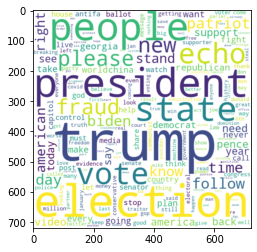

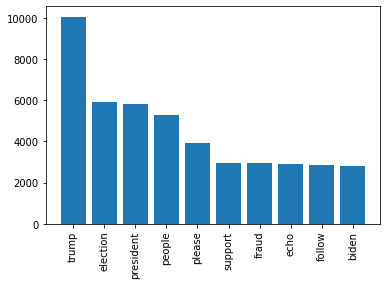

In [49]:
hashtags={}
words={}
text1="";
text2="";
post=[];flag=0;
average=0;
hashtaglength={};
for row in datapostarray:
  l1=[]
  count=0;
  row[-2]=str(row[-2]);
  l1=row[-2].replace('\\n',' ');
  l1=l1.split(" ")
  wordcount=0;
  hashtagslist=[];
  for i in l1:
    if(len(i)>0 and i[0]=='#'):
      if(i not in hashtagslist):
        hashtagslist.append(i);
      if i in hashtags.keys():
        hashtags[i]=hashtags[i]+1
      else:
        hashtags[i]=1
        hashtags.update({i:1})
    else:
      if i.lower() in words.keys() and len(i)>2:
        if i.lower() not in stopword:
          wordcount+=1;
          words[i.lower()]=words[i.lower()]+1
      else:
        if i.lower() not in stopword and len(i)>2 and i[0]!='@':
          l=i.split(".");
          d=0;
          for i1 in l:
            if(i1!=""):
              d+=1;
          if(d>1):
            continue;
          wordcount+=1;
          words[i.lower()]=1
  for k in hashtagslist:
    if(k not in hashtaglength.keys()):
      hashtaglength[k]=wordcount;
    else:
      hashtaglength[k]+=wordcount;

for i in hashtags.keys():
  text1=text1+(" "+i)*hashtags[i];
for i in words.keys():
  text2=text2+(" "+i)*words[i];
collocations=False

wc1=WordCloud(stopwords=stopword,width = 720, height = 720,collocations=False,background_color='white').generate(text2);
plt.figure(figsize = (10, 10), facecolor = None)
plt.figure()
plt.imshow(wc1, interpolation="bilinear")
plt.show()


words=sorted(words.items(), key = 
             lambda kv:(kv[1], kv[0]),reverse=True)
w=[]; freq=[];
for i in range(10):
  w.append(words[i][0]);
  freq.append(words[i][1]);
plt.bar(w, freq, align = 'center', alpha = 1);
plt.xticks(rotation = 90)
plt.show()





averagelength={}
for i in hashtags.keys():
  totalpost=hashtaglength[i];
  freq=hashtags[i];
  avg=totalpost/freq;
  averagelength[i]=avg


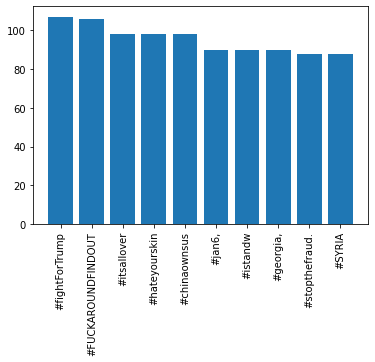

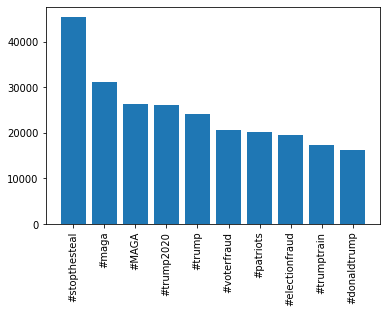

In [ ]:

averagelength=sorted(averagelength.items(), key = 
             lambda kv:(kv[1], kv[0]),reverse=True)  
hashtags=sorted(hashtags.items(), key = 
             lambda kv:(kv[1], kv[0]),reverse=True)  
w=[]; freq=[];
for i in range(10):
  w.append(averagelength[i][0]);
  freq.append(averagelength[i][1]);
plt.bar(w, freq, align = 'center', alpha = 1);
plt.xticks(rotation = 90)
plt.show()
w=[]; freq=[];
for i in range(10):
  w.append(hashtags[i][0]);
  freq.append(hashtags[i][1]);
plt.bar(w, freq, align = 'center', alpha = 1);
plt.xticks(rotation = 90)
plt.show()

3rd Question

In [ ]:
import plotly.graph_objects as go
startarr=datasetposts['CreatedAt'].to_numpy()
onearr=pd.to_datetime(startarr.astype(str)).values
datedic={}
for i in onearr:
  temp = pd.Timestamp(np.datetime64(i))
  temp=str(temp)
  temp=temp.split(" ");
  if(temp[0] in datedic.keys()):
    datedic[temp[0]]=datedic[temp[0]]+1;
  else:
    datedic[temp[0]]=1;
sortdate = sorted(datedic.items(), key=lambda x: x[0], reverse=False)
l1 = []; l2 = []
for i in sortdate:
  l1.append(i[0])
  l2.append(i[1])
figure = go.Figure([go.Scatter(x=l1, y=l2)])
figure.show()

  

In [ ]:
startarr=datasetuser['Joined'].to_numpy()
onearr=pd.to_datetime(startarr.astype(str)).values
datedic={}
for i in onearr:
  temp = pd.Timestamp(np.datetime64(i))
  temp=str(temp)
  temp=temp.split(" ");
  if(temp[0] in datedic.keys()):
    datedic[temp[0]]=datedic[temp[0]]+1;
  else:
    datedic[temp[0]]=1;
sortdate = sorted(datedic.items(), key=lambda x: x[0], reverse=False)
l1 = []; l2 = []
for i in sortdate:
  l1.append(i[0])
  l2.append(i[1])
figure = go.Figure([go.Scatter(x=l1, y=l2)])
figure.show()
